# Exploration des données

In [1]:
import pandas as pd
import numpy as np
dataFrame=pd.read_csv("job-data.csv", encoding='latin-1')

In [2]:
dataFrame.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [3]:
print("number of rows :",dataFrame.shape[0])
print("number of columns :",str(dataFrame.shape[1])," === ", dataFrame.columns)

number of rows : 3198
number of columns : 8  ===  Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities'],
      dtype='object')


In [4]:
dataFrameColumns=dataFrame.columns
print("the data columns are :")
for i in dataFrameColumns:
    print(i)

the data columns are :
Company
Job Title
Location
Job Type
Experience level
Salary
Requirment of the company 
Facilities


In [5]:
print(dataFrame.dtypes)

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object


In [6]:
dataFrame.describe()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


### Missing values

In [7]:
missing_values_count=dataFrame.isna().sum()
missing_values_count[0:8]

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [8]:
total_cells = np.product(dataFrame.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)


1.676829268292683


### Unique Values

In [9]:
def number_of_unique_values(dataframe):
    columns=dataframe.columns
    print("column","====","number of unique values")

    for column in columns:
        if len(dataFrame[column].unique())< 10:
            print("====================================")

            print(column,"====",len(dataFrame[column].unique()),"--",dataFrame[column].unique())
        else:
            column_teen=dataFrame[column].unique()
            print("====================================")
            print(column,"====",len(dataFrame[column].unique()),"--",column_teen[0:5])


In [10]:
number_of_unique_values(dataFrame)

column ==== number of unique values
Company ==== 1107 -- ['SGS' 'Ocorian' 'Cricut' 'Bosch Group' 'Publicis Groupe']
Job Title ==== 2139 -- ['Clinical Data Analyst' 'AML/CFT & Data Analyst'
 'Machine Learning Engineer' 'Application Developer & Data Analyst'
 'Data Engineer Full time (Public Sector) USA']
Location ==== 1118 -- ['Richardson, TX, United States' 'Ebène, Mauritius'
 'South Jordan, UT, United States' 'Nonantola, Italy'
 'Arlington, VA, United States']
Job Type ==== 4 -- ['Full Time' 'Internship' 'Part Time' nan]
Experience level ==== 5 -- ['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level']
Salary ==== 219 -- [' 48K+ *' ' 90K+ *' ' 108K+' ' 184K+' ' 39K+ *']
Requirment of the company  ==== 2600 -- ['Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics'
 'Agile,Data management,Finance,Security,,'
 'Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning'
 'Engineering,Industrial,Oracle,Power BI,R,R&D'
 'AWS,Azure,Computer Science,Consulti

### Duplicates

In [11]:
dataFrame.duplicated().sum()

202

### Company

In [12]:
print(dataFrame["Company"].unique(),
len(dataFrame["Company"].unique()))

['SGS' 'Ocorian' 'Cricut' ... 'DNSFilter' 'MUFG Investor Services'
 'Galileo Financial Technologies'] 1107


### Job Title

In [13]:
print(dataFrame["Job Title"].unique(),
len(dataFrame["Job Title"].unique()))

['Clinical Data Analyst' 'AML/CFT & Data Analyst'
 'Machine Learning Engineer' ...
 'Application Integration Engineer, Computer Vision Program'
 'Senior Software Engineer, Machine Learning - Ads Intelligence'
 'Data Scientist - New College Graduate'] 2139


### Location

In [14]:
print(dataFrame["Location"].unique(),
len(dataFrame["Location"].unique()))

['Richardson, TX, United States' 'Ebène, Mauritius'
 'South Jordan, UT, United States' ...
 'Chantilly, Virginia, United States'
 'Sunnyvale, CA; San Francisco, CA; New York \x85' 'Biñan, Philippines'] 1118


### Job Type

In [15]:
print(dataFrame["Job Type"].unique(),
len(dataFrame["Job Type"].unique()))

['Full Time' 'Internship' 'Part Time' nan] 4


### Experience level
       

In [16]:
print(dataFrame["Experience level"].unique(),
len(dataFrame["Experience level"].unique()))

['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level'] 5


### Salary

the salary form 'corrency,salary,+,*' / 
if there is no corrancy its in '$'  

In [17]:
print(len(dataFrame["Salary"].unique()),"  ",dataFrame["Salary"].unique())
# get the values with the +*

219    [' 48K+ *' ' 90K+ *' ' 108K+' ' 184K+' ' 39K+ *' nan ' 140K+' ' 40K+ *'
 ' 80K+ *' ' 35K+ *' ' 62K+ *' ' 159K+' ' 97K+' ' 92K+ *' ' 129K+ *'
 ' 115K+ *' ' 44K+ *' ' 73K+ *' ' 59K+ *' ' 106K+' ' 105K+ *' ' 55K+ *'
 ' 110K+ *' ' 63K+ *' ' 49K+ *' ' 180K+' ' 127K+' ' 60K+' ' 45K+ *'
 ' 135K+' ' 69K+ *' ' 176K+' ' 65K+ *' ' 51K+ *' ' 67K+' ' 104K+' ' 105K+'
 ' 166K+' ' 131K+ *' ' 115K+' ' 43K+' ' 81K+ *' ' 96K+ *' ' 56K+ *'
 ' 130K+' ' 131K+' ' 50K+ *' ' 100K+' ' 60K+ *' ' 52K+' ' 135K+ *' ' 76K+'
 ' 172K+' ' 119K+' ' 125K+' ' 116K+' ' 77K+ *' ' 74K+ *' ' 70K+ *'
 ' 120K+' ' 189K+' ' 149K+' ' 110K+' ' 90K+' ' 30K+ *' ' 167K+' ' 236K+'
 ' 179K+' ' 80K+' ' 200K+' ' 139K+' ' 129K+' ' 113K+' ' 150K+' ' 158K+'
 ' 40K+' ' 184K+ *' ' 133K+' ' 78K+' ' 36K+ *' ' 122K+ *' ' 81K+' ' 59K+'
 'EUR 81K' ' 190K+' ' 72K+' ' 136K+' ' 102K+ *' ' 31K+ *' ' 89K+ *'
 ' 156K+' ' 107K+' ' 199K+' ' 224K+' ' 142K+' 'GBP 35K' ' 183K+' ' 164K+'
 'EUR 130K+' ' 174K+' ' 84K+' ' 79K+' ' 103K+ *' ' 143K+' ' 175K+'

### Requirment of the company 

In [18]:
print(len(dataFrame["Requirment of the company "].unique()),"  ",dataFrame["Requirment of the company "].unique())

2600    ['Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics'
 'Agile,Data management,Finance,Security,,'
 'Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning'
 ...
 'Computer Science,Data analysis,Engineering,Excel,Feature engineering,Keras'
 'APIs,Clustering,Computer Science,Data visualization,Deep Learning,Docker'
 'Computer Science,Data Analytics,Data Mining,Economics,Engineering,GCP']


###  Facilities

In [19]:
print(len(dataFrame["Facilities"].unique()),"  ",dataFrame["Facilities"].unique())

777    [',,,,' 'Career development,,,,'
 'Flex hours,Flex vacation,Parental leave,Unlimited paid time off,'
 '401(k) matching,Career development,Competitive pay,Equity,Flex hours'
 'Gear,,,,'
 'Career development,Competitive pay,Equity,Flex vacation,Health care'
 'Career development,Medical leave,Salary bonus,Startup environment,'
 'Career development,Health care,Medical leave,,'
 'Career development,Startup environment,,,' 'Flex hours,,,,'
 'Team events,,,,'
 'Career development,Competitive pay,Health care,Salary bonus,'
 'Flex hours,Flex vacation,Home office stipend,Parental leave,Startup environment'
 'Competitive pay,Equity,Health care,Insurance,'
 'Career development,Equity,Fitness / gym,Home office stipend,Relocation support'
 'Career development,Flex hours,,,' 'Career development,Team events,,,'
 'Career development,Flex hours,Health care,,' 'Health care,,,,'
 'Career development,Flex vacation,,,' 'Fitness / gym,,,,'
 'Career development,Flex hours,Health care,Startup environmen


On essaie d'afficher les premières lignes de notre dataset pour juste connaître sa forme.
<ul>
<li>Les valeurs NAN</li>
<p>Est-ce qu'on peut remplir ces valeurs ? Ou bien faut-il les supprimer ?</p>
<li>Liste des <strong>facilities</strong></li>
<p>Une liste qu'on peut séparer</p>
<li>Forme de <strong>salary</strong> "48K+*"</li>
<p>Des salaires avec des étoiles, quelle est la signification de ces étoiles ? On remarque qu'on a des salaires sans "*".</p>
<p>On remarque que les salaires sont en différentes devises, il faut les unifier (€, £, $).</p>

<li>Les <strong>job titles</strong> sont dans différentes langues, il faut les unifier soit en anglais, soit en français.</li>

<li>Les <strong>locations</strong> vont être divisées par ville, état, pays.</li>
</ul>

### language check

other languages existence in the df.

In [20]:
# def detect_language_with_langdetect(line): 
#     from langdetect import detect_langs
#     try: 
#         langs = detect_langs(line) 
#         for item in langs: 
#             # The first one returned is usually the one that has the highest probability
#             return item.lang
#     except: return "err"


In [21]:
# prob_lang=list(map(detect_language_with_langdetect,dataFrame['Job Title'].to_list()))

In [22]:
# unique_langs=set(prob_lang)

In [23]:
# unique_langs

In [24]:
# import pandas as pd
# import langdetect
# import re



# def remove_emoji(text):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

# def is_english(text):
#     if not isinstance(text, str):
#         return False
#     try:
#         text = remove_emoji(text)
#         lang = langdetect.detect(text)
#         return lang == 'en'
#     except langdetect.LangDetectException:
#         return False

# # Apply the function to create a new column
# dataFrame['Is English'] = dataFrame['Job Title'].apply(is_english)

# # Calculate counts
# english_count = dataFrame['Is English'].sum()
# total_count = len(dataFrame)
# other_count = total_count - english_count

# # Calculate percentages
# english_percentage = english_count / total_count * 100
# other_percentage = other_count / total_count * 100

# print(f"English: {english_percentage:.2f}%, Other: {other_percentage:.2f}%")


# Data Cleaning

In [25]:
dataFrame.columns

Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities'],
      dtype='object')

In [26]:
new_column_name={'Company': 'company','Job Title': 'job_title',
 'Location': 'location',
 'Job Type': 'job_type',
 'Experience level': 'experience_level',
 'Salary': 'salary',
 'Requirment of the company ': 'requirment_of_the_company',
'Facilities': 'facilities',
'Job Title Extracted': 'job_title_extracted',
'Country': 'country',
'Salary Category': 'salary_category',
'Remote': 'remote',
'Hybrid': 'hybrid',
'Local': 'local',
'Category': 'category'}
dataFrame = dataFrame.rename(columns=new_column_name)



In [27]:
dataFrame

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
...,...,...,...,...,...,...,...,...
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,S...",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,"


In [28]:
print("list of unique Salary :",dataFrame["salary"].sort_values(ascending=False).unique().tolist())

list of unique Salary : ['GBP 80K+', 'GBP 65K+', 'GBP 60K+', 'GBP 55K+', 'GBP 55K', 'GBP 54K+', 'GBP 51K+', 'GBP 50K+', 'GBP 45K+', 'GBP 42K+', 'GBP 35K', 'EUR 81K', 'EUR 80K+', 'EUR 60K+', 'EUR 36K+', 'EUR 130K+', ' 99K+', ' 98K+', ' 97K+', ' 96K+ *', ' 96K+', ' 95K+ *', ' 95K+', ' 94K+', ' 93K+', ' 92K+ *', ' 90K+ *', ' 90K+', ' 89K+ *', ' 86K+', ' 85K+', ' 84K+', ' 83K+', ' 82K+', ' 81K+ *', ' 81K+', ' 80K+ *', ' 80K+', ' 79K+', ' 78K+', ' 77K+ *', ' 76K+', ' 75K+ *', ' 75K+', ' 74K+ *', ' 74K+', ' 73K+ *', ' 73K+', ' 72K+', ' 71K+', ' 70K+ *', ' 70K+', ' 69K+ *', ' 68K+', ' 67K+', ' 66K+ *', ' 66K+', ' 65K+ *', ' 65K+', ' 63K+ *', ' 63K+', ' 62K+ *', ' 61K+ *', ' 60K+ *', ' 60K+', ' 59K+ *', ' 59K+', ' 57K+ *', ' 56K+ *', ' 55K+ *', ' 55K+', ' 54K+ *', ' 52K+', ' 51K+ *', ' 51K+', ' 50K+ *', ' 50K+', ' 49K+ *', ' 48K+ *', ' 45K+ *', ' 45K+', ' 44K+ *', ' 43K+', ' 42K+ *', ' 40K+ *', ' 40K+', ' 39K+ *', ' 36K+ *', ' 35K+ *', ' 33K+ *', ' 31K+ *', ' 315K+', ' 310K+', ' 30K+ *', ' 295

## Duplicates

In [29]:
# delete and check of duplicates :
dataFrame.drop_duplicates(inplace=True)
dataFrame.duplicated().sum()

0

## Handling Missing Values

### Salary

In [30]:
print("Number of messing values in the salary :",dataFrame[dataFrame["salary"].isna()].shape[0])

Number of messing values in the salary : 172


In [31]:
dataFrame[(dataFrame["experience_level"]=="Entry-level") & ( dataFrame["salary"].isna()) ]

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
7,NielsenIQ,Intern (Business Intelligence Service Support),"Bangkok, Thailand",Internship,Entry-level,NaN,"Business Intelligence,Excel,Genetics,,,",",,,,"
8,Western Digital,Summer 2023 Data Engineering Intern,"San Jose, CA, United States",Internship,Entry-level,NaN,"Big Data,Computer Science,Engineering,Machine ...","Career development,Competitive pay,Equity,Flex..."
44,REWE International Dienstleistungsgesellschaft...,Junior Data Science Engineer (m/w/x),"Wien, Austria",Full Time,Entry-level,NaN,"CI/CD,Computer Science,Data pipelines,Deep Lea...",",,,,"
75,Metiora,Data Analyst Intern,"Madrid, Spain",Full Time,Entry-level,NaN,"Matplotlib,MongoDB,NumPy,Pandas,Power BI,Python",",,,,"
170,Wallbox,Analytics Engineer Intern,"Barcelona, Catalonia, Spain",Internship,Entry-level,NaN,"Airflow,BigQuery,CI/CD,Databricks,Data quality...","Career development,Flex hours,Team events,,"
...,...,...,...,...,...,...,...,...
3107,Barbaricum,AI Intern (ChatGPT Specialist),Remote,Internship,Entry-level,NaN,"APIs,ChatGPT,Engineering,GPT,GPT-3,GPT-4","Career development,,,,"
3109,METRO/MAKRO,STAGE 6 mois - Data Scientist Junior H/F,"Nanterre, France",Full Time,Entry-level,NaN,"Big Data,Power BI,Python,R,SQL,",",,,,"
3134,Junglee Games,ETL and Data Warehouse Testing Intern,"Bengaluru, Karnataka, India",Internship,Entry-level,NaN,"Computer Science,Data quality,Data warehouse,E...",",,,,"
3152,Lely,"Stage: Computer Science, Robotics, Computer Vi...","Maassluis, Netherlands",Full Time,Entry-level,NaN,"Computer Science,Computer Vision,Engineering,O...",",,,,"


In [32]:
dataFrame[(dataFrame["experience_level"]!="Entry-level") & ( dataFrame["salary"].isna())]

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
39,Angi,Senior Data Scientist,"Indianapolis, IN - Hybrid",Full Time,Senior-level,NaN,"Big Data,Data Mining,Machine Learning,Mathemat...","401(k) matching,Career development,Competitive..."
87,Civis Analytics,Lead Applied Data Scientist (Experience with M...,Remote,Full Time,Senior-level,NaN,"Causal inference,Computer Science,Consulting,D...","401(k) matching,Career development,Competitive..."
168,Faraday Future,Senior Big Data Engineer,"San Jose, California, United States",Full Time,Senior-level,NaN,"Airflow,AWS,Azure,Big Data,Computer Science,Da...","Equity,Relocation support,,,"
201,Veritone,Data Analytics Engineer,United States,Full Time,Senior-level,NaN,"Agile,APIs,AWS,Business Analytics,Business Int...","401(k) matching,Career development,Competitive..."
208,Publicis Groupe,Senior Associate Data Engineering,"Houston, TX, United States",Full Time,Mid-level,NaN,"Agile,Architecture,AWS,Azure,BigQuery,Bigtable","Career development,Flex hours,Flex vacation,Pa..."
274,Outrider,"Senior Manager, Perception Deep Learning",Remote,Full Time,Senior-level,NaN,"Deep Learning,Engineering,Machine Learning,Pyt...","Career development,Equity,Salary bonus,Startup..."
299,Phaidra,AI Research Engineer,Remote,Full Time,Senior-level,NaN,"Computer Science,Deep Learning,Docker,Engineer...","Career development,Competitive pay,Equity,Gear..."
302,Phaidra,AI Research Scientist,Remote,Full Time,Senior-level,NaN,"Architecture,Deep Learning,Docker,GCP,GitLab,I...","Career development,Competitive pay,Equity,Gear..."
329,Fulcrum Digital Inc.,System Reliability Engineer (Big Data),"Northwest Township, MO, United States",Full Time,Senior-level,NaN,"Big Data,Bitbucket,CI/CD,Data analysis,Data go...",",,,,"
334,AudioEye,Staff Machine Learning Engineer,Remote - United States,Full Time,Senior-level,NaN,"Computer Science,Computer Vision,Data pipeline...","401(k) matching,Career development,Competitive..."


#### Number of NaN Values in Salary by Experience Level

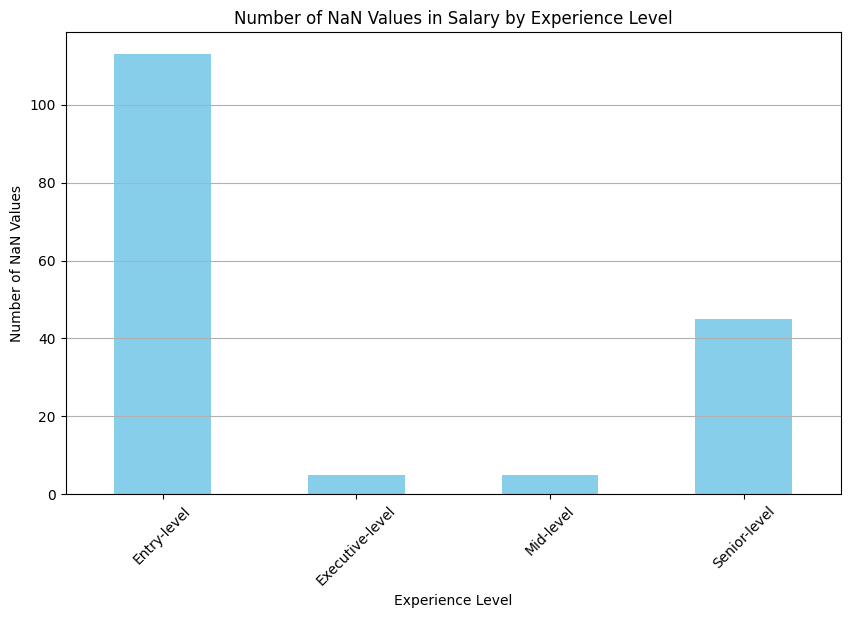

In [33]:
import matplotlib.pyplot as plt

nan_counts = dataFrame['salary'].isna().groupby(dataFrame['experience_level']).sum()

nan_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of NaN Values in Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [34]:
dataFrame["salary"].fillna('negociable',inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_8488\254552295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame["salary"].fillna('negociable',inplace=True)


In [35]:
dataFrame[dataFrame["salary"]=="negociable"]

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
7,NielsenIQ,Intern (Business Intelligence Service Support),"Bangkok, Thailand",Internship,Entry-level,negociable,"Business Intelligence,Excel,Genetics,,,",",,,,"
8,Western Digital,Summer 2023 Data Engineering Intern,"San Jose, CA, United States",Internship,Entry-level,negociable,"Big Data,Computer Science,Engineering,Machine ...","Career development,Competitive pay,Equity,Flex..."
39,Angi,Senior Data Scientist,"Indianapolis, IN - Hybrid",Full Time,Senior-level,negociable,"Big Data,Data Mining,Machine Learning,Mathemat...","401(k) matching,Career development,Competitive..."
44,REWE International Dienstleistungsgesellschaft...,Junior Data Science Engineer (m/w/x),"Wien, Austria",Full Time,Entry-level,negociable,"CI/CD,Computer Science,Data pipelines,Deep Lea...",",,,,"
75,Metiora,Data Analyst Intern,"Madrid, Spain",Full Time,Entry-level,negociable,"Matplotlib,MongoDB,NumPy,Pandas,Power BI,Python",",,,,"
...,...,...,...,...,...,...,...,...
3109,METRO/MAKRO,STAGE 6 mois - Data Scientist Junior H/F,"Nanterre, France",Full Time,Entry-level,negociable,"Big Data,Power BI,Python,R,SQL,",",,,,"
3134,Junglee Games,ETL and Data Warehouse Testing Intern,"Bengaluru, Karnataka, India",Internship,Entry-level,negociable,"Computer Science,Data quality,Data warehouse,E...",",,,,"
3152,Lely,"Stage: Computer Science, Robotics, Computer Vi...","Maassluis, Netherlands",Full Time,Entry-level,negociable,"Computer Science,Computer Vision,Engineering,O...",",,,,"
3159,Deezer,Data Analyst Intern m/f/d - Business,"Paris, France",Internship,Entry-level,negociable,"Data analysis,Data pipelines,Data visualizatio...","Career development,Health care,Insurance,Start..."


In [36]:
dataFrame[dataFrame['salary'].str.contains('\*')]
# "* ":Additional Compensation

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
6,Natixis in Portugal,Vendor Management and Data Quality Lead,"Porto, Portugal",Full Time,Entry-level,39K+ *,"Banking,Data quality,Excel,Security,,","Gear,,,,"
...,...,...,...,...,...,...,...,...
3179,C3.ai,Lead Data Scientist - Healthcare,"London, UK",Full Time,Senior-level,129K+ *,"Architecture,Classification,Computer Science,D...","Career development,Competitive pay,,,"
3183,TripAdvisor,Senior Data Engineer - Martech (Viator),"London, United Kingdom",Full Time,Senior-level,115K+ *,"Airflow,APIs,Architecture,AWS,Business Intelli...","Career development,Competitive pay,Fitness / g..."
3187,Marley Spoon,People Data Specialist,"Lisbon, Lisbon, Portugal",Full Time,Mid-level,70K+ *,"Data analysis,Excel,Finance,,,","Career development,Equity,Flex hours,Flex vaca..."
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"


In [37]:
dataFrame['salary'] = dataFrame['salary'].astype(str)

def categorize_salary(salary_value):
    if '+' in salary_value and '*' in salary_value:
        return 'Additional Compensation'
    elif '+' in salary_value:
        return ' minimum salary'
    elif salary_value=='negociable':
        return 'negociable'

dataFrame['salary_category'] = dataFrame['salary'].apply(categorize_salary)

In [38]:
# In Python, particularly when used with pandas, the tilde (~) operator is a bitwise NOT operator. 
dataFrame[~dataFrame['salary'].str.contains('\*')].sample(15)

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities,salary_category
1187,Airbnb,"Senior Data Engineer, Marketing Data",United States,Full Time,Senior-level,185K+,"Airflow,Data pipelines,Data quality,Engineerin...","Salary bonus,Startup environment,,,",minimum salary
1982,Illumio,Senior Machine Learning Engineer,"Sunnyvale, California",Full Time,Senior-level,175K+,"Agile,AWS,Azure,Big Data,Clustering,Computer S...","Career development,Equity,Health care,Medical ...",minimum salary
522,ChargePoint,Data Science Intern,"Campbell, CA",Internship,Entry-level,negociable,"AWS,Big Data,Business Intelligence,Data analys...","Career development,Equity,Gear,,",negociable
2509,Collibra,"Senior Enterprise Architect, Data Quality",New York City,Full Time,Senior-level,196K+,"APIs,Big Data,Computer Science,Data quality,En...",",,,,",minimum salary
2238,Mekari,Internship: Business Intelligence,"Jakarta, Jakarta, Indonesia",Internship,Entry-level,negociable,"Big Data,Business Intelligence,Computer Scienc...","Career development,,,,",negociable
1727,Supernal,Sr. Data Engineer,"Washington, DC",Full Time,Senior-level,151K+,"AWS,Azure,Big Data,BigQuery,CI/CD,Computer Sci...","Equity,Flex vacation,Salary bonus,Startup envi...",minimum salary
1237,Appier,Machine Learning Scientist (Intern),Taiwan,Internship,Entry-level,negociable,"Big Data,Computer Science,Data Mining,Engineer...","Career development,,,,",negociable
1873,"Faire Wholesale, Inc.","Business Intelligence Manager, Finance","New York City, NY",Full Time,Senior-level,147K+,"Business Intelligence,Computer Science,Data An...","Career development,Equity,Flex hours,Team events,",minimum salary
2335,Block,"Senior Machine Learning Engineer, ML Platform","San Francisco, CA, United States",Full Time,Senior-level,142K+,"AWS,Banking,Blockchain,Computer Science,Crypto...","Career development,Equity,Health care,Insuranc...",minimum salary
1893,Oxfam America,Analytics Engineer,"Boston, MA, United States",Full Time,Senior-level,84K+,"Agile,APIs,Computer Science,Data pipelines,Dat...","Career development,Equity,Team events,,",minimum salary


In [39]:
dataFrame['salary'] = dataFrame['salary'].str.replace(r'[+*]', '', regex=True)
def convert_to_usd(salary_value):
    if salary_value=='negociable' :
        return 'negociable'
    if 'GBP' in salary_value:
        salary_value = float(salary_value.replace('GBP', '').replace('K', '')) * 1.37 * 1000
    elif 'EUR' in salary_value:
        salary_value = float(salary_value.replace('EUR', '').replace('K', '')) * 1.18 * 1000
    elif 'K' in salary_value:
        salary_value = float(salary_value.replace('K', '')) * 1000
    else:
        salary_value = float(salary_value)
    
    return salary_value

dataFrame['salary'] = dataFrame['salary'].apply(convert_to_usd)

In [42]:
def replace_nan(column_name,replacer):
    dataFrame[column_name].fillna(replacer,inplace=True)


### experience_level & job_type

In [43]:
replace_nan("experience_level","undefined")
replace_nan("job_type","undefined")

C:\Users\pc\AppData\Local\Temp\ipykernel_8488\3452294606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame[column_name].fillna(replacer,inplace=True)


In [52]:
dataFrame[dataFrame["job_type"]=="undefined"]

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities,salary_category


In [51]:
dataFrame.drop(797,inplace=True)